### 환경준비

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 데이터 확인

In [22]:
df=pd.read_csv('/content/drive/MyDrive/KHUDA/project_nlp/chatgpt-reddit-comments.csv')
df.head()

,Unnamed: 0,comment_id,comment_parent_id,comment_body,subreddit
0,0,iztdxuh,t3_zj2aeu,"I've been shocked for days now, I don't need c...",r/ChatGPT
1,1,iztn0q0,t3_zj2aeu,\n\nI am so angry right now. I just wasted my...,r/ChatGPT
2,2,izudrph,t3_zj2aeu,chatgpt karma whoring is here folks! just when...,r/ChatGPT
3,3,iztfhtb,t3_zj2aeu,"Worked on me, ngl.",r/ChatGPT
4,4,izu2as9,t3_zj2aeu,"Certified 10/10, must-see moment. It really di...",r/ChatGPT


### 데이터 크기

In [4]:
for file in os.listdir('/content/drive/MyDrive/KHUDA/project_nlp/'):
    if 'csv' in file and 'zip' not in file:
        print(file.ljust(30)+str(round(os.path.getsize('/content/drive/MyDrive/KHUDA/project_nlp/'+file)/1000000, 2))+'MB')

chatgpt-reddit-comments.csv   14.05MB
test.csv                      0.17MB
train.csv                     0.72MB


### 컬럼명 확인

In [5]:
df.columns

Index(['Unnamed: 0', 'comment_id', 'comment_parent_id', 'comment_body',
       'subreddit'],
      dtype='object')

### 행, 열 크기 확인

In [14]:
df.shape

(52416, 5)

### 정보 확인

In [15]:
df.info

<bound method DataFrame.info of       Unnamed: 0 comment_id comment_parent_id  \
0              0    iztdxuh         t3_zj2aeu   
1              1    iztn0q0         t3_zj2aeu   
2              2    izudrph         t3_zj2aeu   
3              3    iztfhtb         t3_zj2aeu   
4              4    izu2as9         t3_zj2aeu   
...          ...        ...               ...   
52411      16668    j5m0v6m        t3_10jmvpj   
52412      16669    j5m6aj0        t1_j5m0v6m   
52413      16670    j5nylax        t1_j5m0v6m   
52414      16671    j5mwpdr        t1_j5m6aj0   
52415                  NaN               NaN   

                                            comment_body     subreddit  
0      I've been shocked for days now, I don't need c...     r/ChatGPT  
1       \n\nI am so angry right now. I just wasted my...     r/ChatGPT  
2      chatgpt karma whoring is here folks! just when...     r/ChatGPT  
3                                     Worked on me, ngl.     r/ChatGPT  
4      Certifi

### 요약 통계량

In [17]:
df.describe()

,Unnamed: 0,comment_id,comment_parent_id,comment_body,subreddit
count,52413,52415,52415,52415,52415
unique,29712,52413,22596,51042,5
top,0,comment_id,t3_107vs7i,[deleted],r/ChatGPT
freq,4,3,239,661,29711


### 특수문자 제거하기

In [33]:
import re
df['comment_body'] = df['comment_body'].str.replace(pat=r'@[\w_]+', repl= r'', regex=True)  #emoticon 제거
df['comment_body'] = df['comment_body'].str.replace(pat=r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', repl= r'', regex=True) #http로 시작되는 url 제거
df['comment_body'] = df['comment_body'].str.replace(pat=r"[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{2,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)", repl= r'', regex=True) #http로 시작되지 않는 url 제거
df['comment_body'] = df['comment_body'].str.replace(pat='[#]+[0-9a-zA-Z_]+', repl= r'', regex=True) # hashtag 제거
df['comment_body'] = df['comment_body'].str.replace(pat='[^a-zA-Z]', repl= r' ', regex=True) #특수문자 제거


In [34]:
df.head()

,Unnamed: 0,comment_id,comment_parent_id,comment_body,subreddit
0,0,iztdxuh,t3_zj2aeu,I ve been shocked for days now I don t need c...,r/ChatGPT
1,1,iztn0q0,t3_zj2aeu,I am so angry right now I just wasted my t...,r/ChatGPT
2,2,izudrph,t3_zj2aeu,chatgpt karma whoring is here folks just when...,r/ChatGPT
3,3,iztfhtb,t3_zj2aeu,Worked on me ngl,r/ChatGPT
4,4,izu2as9,t3_zj2aeu,Certified must see moment It really di...,r/ChatGPT


### 총 결측치 개수

In [35]:
df['comment_body'].isnull().sum()

1

### comment_body 컬럼에서 결측치 있는 행 제거

In [36]:
df['comment_body'].dropna(axis=0)

0        I ve been shocked for days now  I don t need c...
1           I am so angry right now  I just wasted my t...
2        chatgpt karma whoring is here folks  just when...
3                                       Worked on me  ngl 
4        Certified        must see moment  It really di...
                               ...                        
52410    Scary thing is  in this future text won t be t...
52411               Read the T O S   you ll thank me later
52412                           What am I missing here    
52413              What does ChatGTP think of its own TOS 
52414    Don t know what they re referring to in the TO...
Name: comment_body, Length: 52415, dtype: object

In [40]:
df['comment_body']=df['comment_body'].astype(str) #숫자가 섞여있어서 string type으로 변환

### 각 comment의 문자 길이 분포

In [42]:
train_length = df['comment_body'].apply(len)
train_length.head()

0      55
1    1204
2     131
3      18
4      68
Name: comment_body, dtype: int64

Text(0, 0.5, 'Number of comment')

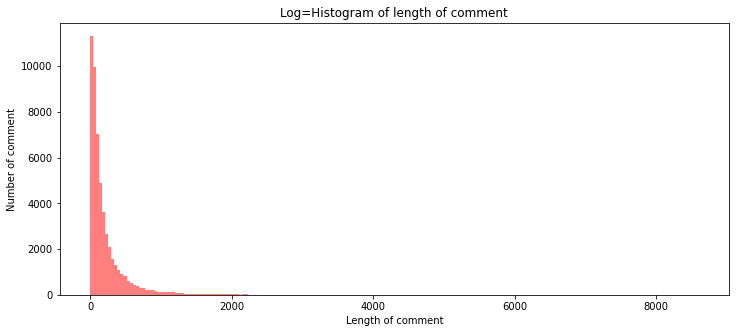

In [44]:
plt.figure(figsize=(12,5))
plt.hist(train_length, bins=200, alpha=0.5, color='r', label='word')
plt.title('Log=Histogram of length of comment')
plt.xlabel('Length of comment')
plt.ylabel('Number of comment')

### comment 길이 관련 통계값

In [45]:
print('comment 길이 최대값 : {}'.format(np.max(train_length)))
print('comment 길이 최소값 : {}'.format(np.min(train_length)))
print('comment 길이 평균값 : {:.2f}'.format(np.mean(train_length)))
print('comment 길이 표준편차 : {:.2f}'.format(np.std(train_length)))
print('comment 길이 중간값 : {}'.format(np.median(train_length)))
print('comment 길이 제1사분위 : {}'.format(np.percentile(train_length, 25)))
print('comment 길이 제3사분위 : {}'.format(np.percentile(train_length, 75)))


comment 길이 최대값 : 8604
comment 길이 최소값 : 0
comment 길이 평균값 : 222.77
comment 길이 표준편차 : 357.80
comment 길이 중간값 : 115.0
comment 길이 제1사분위 : 50.0
comment 길이 제3사분위 : 255.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7f01accb1e20>,
 'caps': [<matplotlib.lines.Line2D at 0x7f01acca1400>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f01accb1b50>],
 'medians': [<matplotlib.lines.Line2D at 0x7f01acca19a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f01acca1f40>],
 'means': [<matplotlib.lines.Line2D at 0x7f01acca1c70>]}

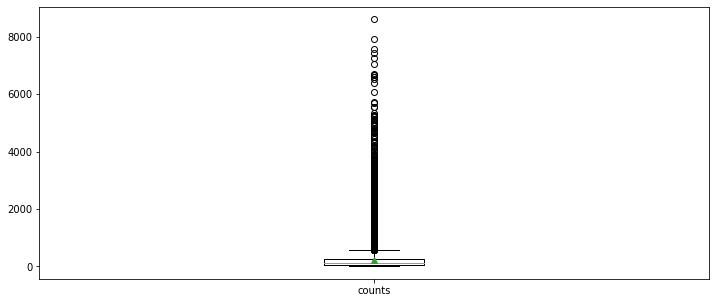

In [46]:
plt.figure(figsize=(12,5))
plt.boxplot(train_length, labels=['counts'], showmeans=True)

### 많이 사용되는 단어들(Wordcloud)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


(-0.5, 599.5, 399.5, -0.5)

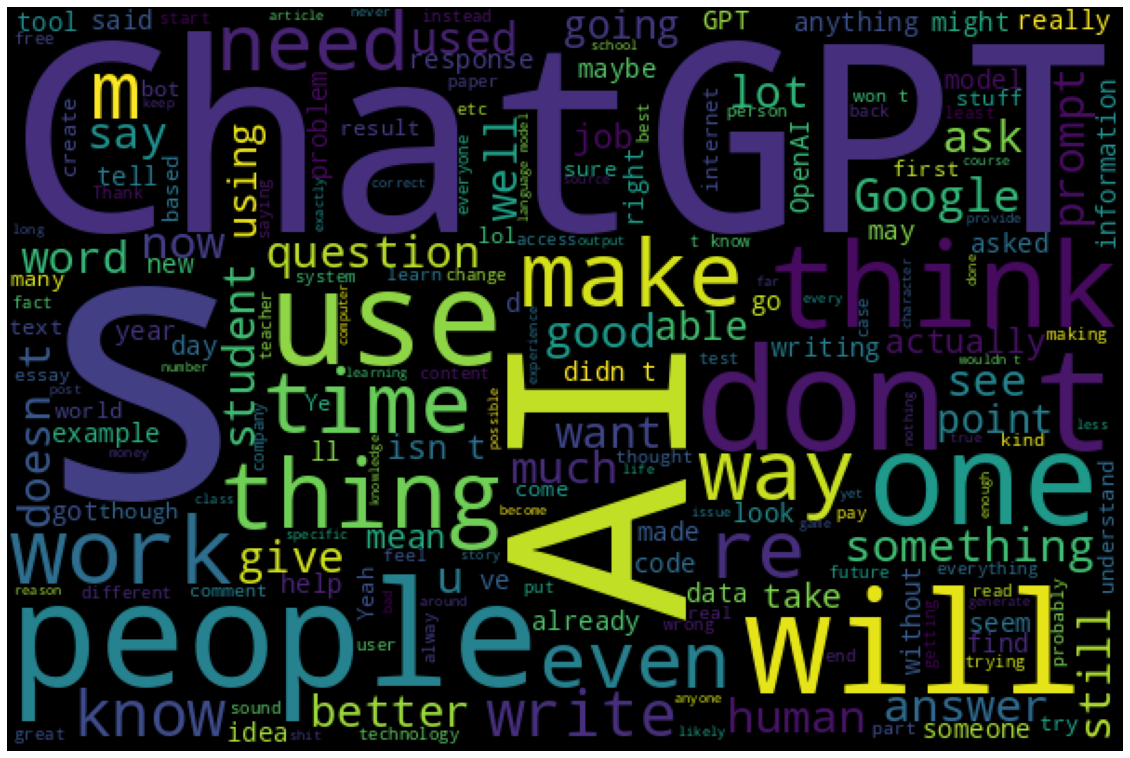

In [51]:
!pip install wordcloud

from wordcloud import WordCloud
cloud = WordCloud(width=600, height=400).generate(" ".join(df['comment_body']))
plt.figure(figsize=(20,15))
plt.imshow(cloud)
plt.axis('off')